In [16]:
import pandas as pd
import numpy as np

In [17]:
df =pd.read_csv('/Users/mac/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [18]:
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [19]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [20]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
df = df.drop('CUST_ID', axis=1)

In [23]:
hier_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hier_clustering.fit(df)

AgglomerativeClustering(n_clusters=3)

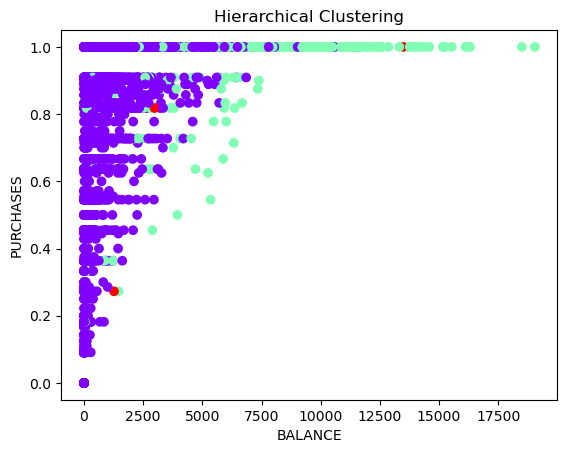

In [37]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=hier_clustering.labels_, cmap='rainbow')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Hierarchical Clustering')
plt.show()

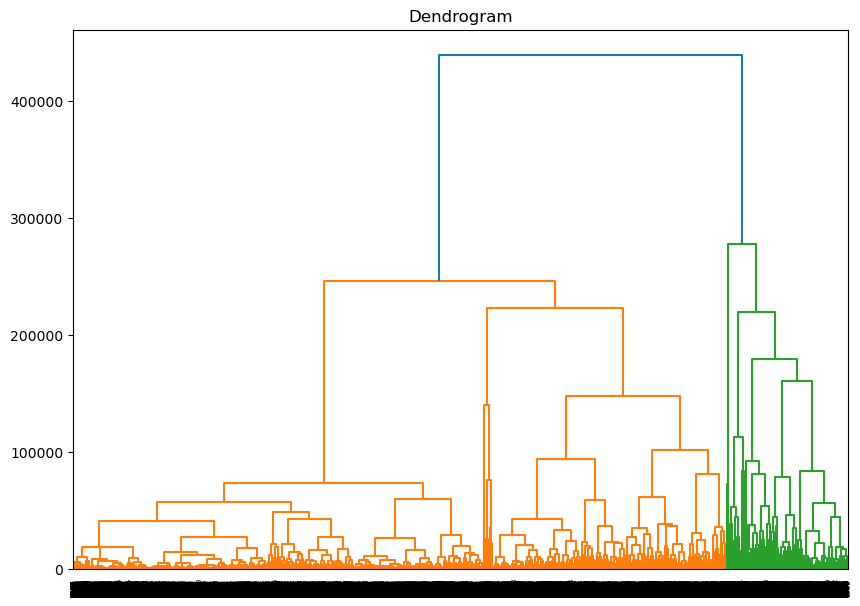

In [35]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(df, method='ward'))

In [36]:
kmeans_clustering = KMeans(n_clusters=3)
kmeans_clustering.fit(df)

KMeans(n_clusters=3)

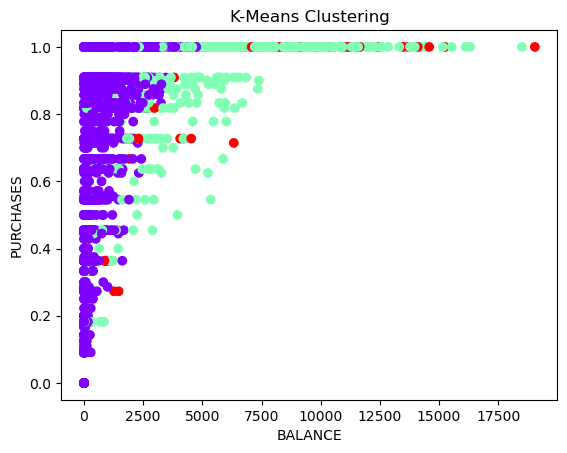

In [33]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kmeans_clustering.labels_, cmap='rainbow')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('K-Means Clustering')
plt.show()

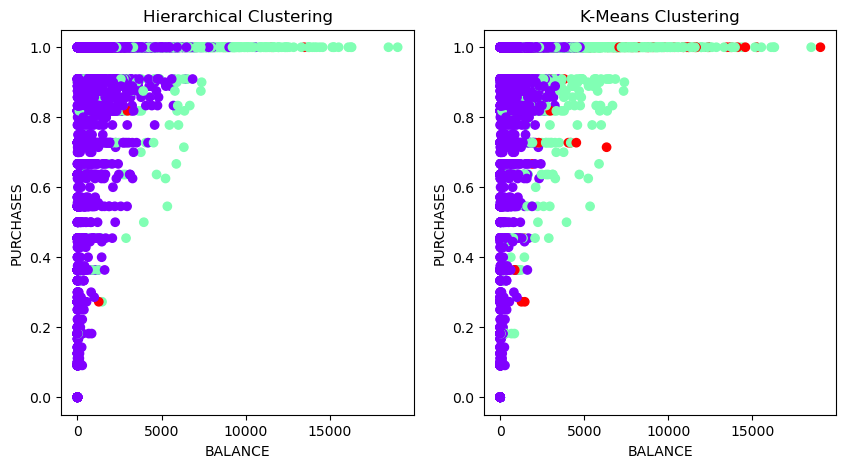

In [34]:
plt.subplots(1, 2, figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=hier_clustering.labels_, cmap='rainbow')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Hierarchical Clustering')
plt.subplot(1, 2, 2)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kmeans_clustering.labels_, cmap='rainbow')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('K-Means Clustering')
plt.show()